<a href="https://colab.research.google.com/github/ruwanwija/Research-Models/blob/main/Flood_Prediction_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression for Rain Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

In [ ]:
X = df.drop('Flood_Status',axis=1)
y = df['Flood_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

In [ ]:
X_train = X_train.drop(columns=non_numeric_cols)
X_test = X_test.drop(columns=non_numeric_cols)

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.60
Confusion Matrix:
[[0 2 2 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 9]]
Classification Report:
              precision    recall  f1-score   support

       Alert       0.00      0.00      0.00         5
    Critical       0.00      0.00      0.00         0
       Major       0.00      0.00      0.00         0
       Minor       0.00      0.00      0.00         1
          No       1.00      1.00      1.00         9

    accuracy                           0.60        15
   macro avg       0.20      0.20      0.20        15
weighted avg       0.60      0.60      0.60        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

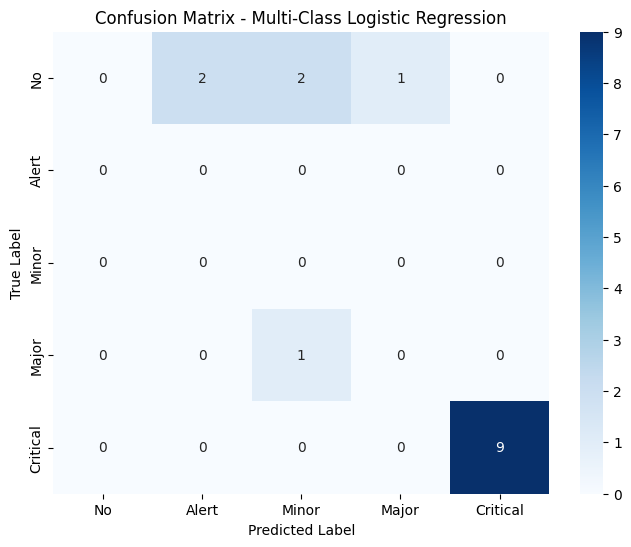

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['No','Alert', 'Minor', 'Major', 'Critical']
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix - Multi-Class Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Logistic Regression with cross validation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns


In [ ]:
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    # Fit and transform the column in the original DataFrame
    X[col] = label_encoders[col].fit_transform(X[col])

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

In [ ]:
pipeline = make_pipeline(StandardScaler(), model)

In [ ]:
k = 5

In [ ]:
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(pipeline, X, y, cv=skf, scoring=scoring)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multin

In [ ]:
print("Cross-Validation Results:")
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()}: {scores.mean():.2f} (+/- {scores.std():.2f})")

Cross-Validation Results:
Accuracy: 0.85 (+/- 0.10)
Precision_macro: 0.67 (+/- 0.22)
Recall_macro: 0.71 (+/- 0.18)
F1_macro: 0.67 (+/- 0.19)


In [ ]:
param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__solver': ['lbfgs', 'saga'],
    'logisticregression__max_iter': [200, 500, 1000]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid_search.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=200,
                                                           multi_class='multinomial'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1, 10, 100],
                         'logisticregression__max_iter': [200, 500, 1000],
                         'logisticregression__solver': ['lbfgs', 'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")


Best Parameters: {'logisticregression__C': 100, 'logisticregression__max_iter': 1000, 'logisticregression__solver': 'saga'}
Best Cross-Validation Accuracy: 0.88


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
best_cv_scores = cross_val_score(best_model, X, y, cv=skf, scoring='accuracy')
print(f"\nBest Model Cross-Validation Accuracy: {best_cv_scores.mean():.2f} (+/- {best_cv_scores.std():.2f})")


Best Model Cross-Validation Accuracy: 0.88 (+/- 0.07)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sa

# K-NN Algorithm

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

In [ ]:
X = df.drop('Flood_Status', axis=1)
y = df['Flood_Status']

In [ ]:
ohe = OneHotEncoder(sparse_output=False)

In [ ]:
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
numerical_pipeline = make_pipeline(StandardScaler())
categorical_pipeline = make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown='ignore'))

In [ ]:
X_numerical = numerical_pipeline.fit_transform(X[numerical_features])
X_categorical = categorical_pipeline.fit_transform(X[categorical_features])

In [ ]:
X_encoded = pd.concat([pd.DataFrame(X_numerical), pd.DataFrame(X_categorical)], axis=1)


In [ ]:
k_folds = 5


In [ ]:
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)


In [ ]:
k = 5  # You can change the value of 'k' as needed
pipeline = make_pipeline(
    StandardScaler(),             # Standardizes the features
    KNeighborsClassifier(n_neighbors=k)  # k-NN model
)

In [ ]:
y_pred = cross_val_predict(pipeline, X_encoded, y, cv=skf)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
target_names = ['No','Minor', 'Alert', 'Critical', 'Major']


In [ ]:
report = classification_report(y, y_pred, target_names=target_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          No       0.71      0.92      0.80        24
       Minor       0.00      0.00      0.00         1
       Alert       0.00      0.00      0.00         1
    Critical       0.00      0.00      0.00         9
       Major       0.90      0.97      0.94        39

    accuracy                           0.81        74
   macro avg       0.32      0.38      0.35        74
weighted avg       0.71      0.81      0.75        74



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
conf_mat = confusion_matrix(y, y_pred)

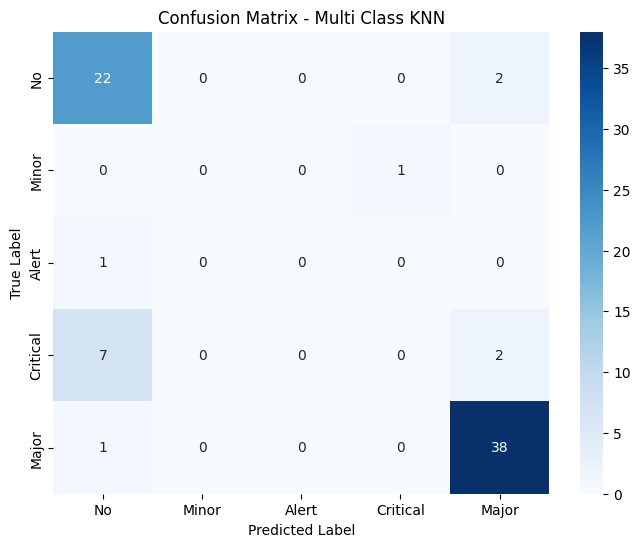

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix - Multi Class KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Naive Bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

In [ ]:
rain = df.dropna()

In [ ]:
X = df.drop('Flood_Status', axis=1)
y = df['Flood_Status']

In [ ]:
k_folds = 5

In [ ]:
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)


In [ ]:
pipeline = make_pipeline(
    StandardScaler(),  # Standardizes the features
    GaussianNB()       # Naive Bayes model (GaussianNB for continuous features)
)

In [ ]:
y_pred = cross_val_predict(pipeline, X_encoded, y, cv=skf)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
target_names = ['No','Minor', 'Alert', 'Critical', 'Major']

In [ ]:
report = classification_report(y, y_pred, target_names=target_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.96      0.92        24
       Minor       0.00      0.00      0.00         1
       Alert       0.00      0.00      0.00         1
    Critical       0.70      0.78      0.74         9
       Major       1.00      0.97      0.99        39

    accuracy                           0.92        74
   macro avg       0.52      0.54      0.53        74
weighted avg       0.90      0.92      0.91        74



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
conf_mat = confusion_matrix(y, y_pred)

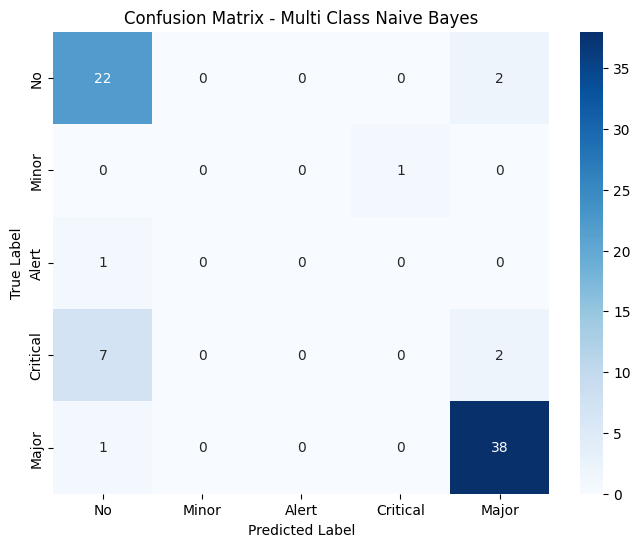

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix - Multi Class Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# SVM

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

In [ ]:
X = rain.drop('Flood_Status', axis=1)  # Adjust 'target_column'
y = rain['Flood_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Remove stratify=y

In [ ]:
svm_model = SVC(kernel='linear', C=1.0)

In [ ]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9130434782608695

Classification Report:
               precision    recall  f1-score   support

       Alert       0.88      1.00      0.93         7
    Critical       0.00      0.00      0.00         1
       Minor       0.50      0.50      0.50         2
          No       1.00      1.00      1.00        13

    accuracy                           0.91        23
   macro avg       0.59      0.62      0.61        23
weighted avg       0.88      0.91      0.89        23



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[ 7  0  0  0]
 [ 0  0  1  0]
 [ 1  0  1  0]
 [ 0  0  0 13]]


In [ ]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

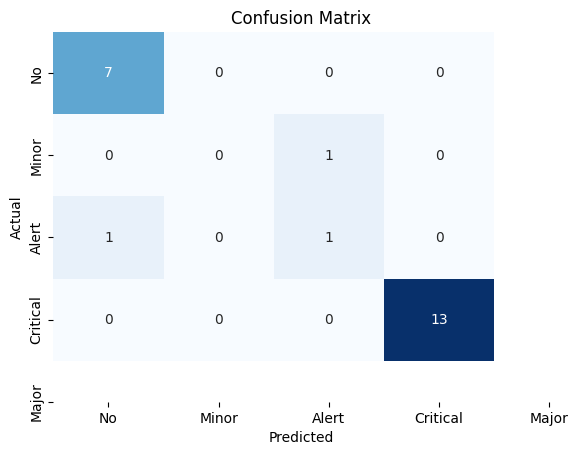

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X, y, cv=kfold)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("Standard Deviation of CV Scores: {:.2f}%".format(cv_scores.std() * 100))


Cross-Validation Scores: [1.         0.86666667 0.86666667 0.86666667 0.85714286]
Mean CV Accuracy: 89.14%
Standard Deviation of CV Scores: 5.44%


#Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

In [ ]:
rain = rain.dropna()


In [ ]:
X = rain.drop('Flood_Status', axis=1)  # Adjust 'target_column'
y = rain['Flood_Status']

In [ ]:
categorical_features = X.select_dtypes(include=['object']).columns # Select columns with object (string) dtype
X_encoded = encoder_ohe.fit_transform(X[categorical_features])

In [ ]:
encoder = StandardScaler() # Initialize StandardScaler
X_numerical = X[numerical_features] # Select only numerical features
X_numerical_scaled = encoder.fit_transform(X_numerical)

In [ ]:
X_final = pd.concat([pd.DataFrame(X_numerical_scaled, columns=numerical_features), X_encoded_df], axis=1)


In [ ]:
k_folds = 5

In [ ]:
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)


In [ ]:
pipeline = make_pipeline(
    StandardScaler(),                    # Standardizes the features
    DecisionTreeClassifier(random_state=42)  # Decision Tree model
)

In [ ]:
y_pred = cross_val_predict(pipeline, X_final, y, cv=skf)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
target_names = ['No', 'Minor', 'Alert', 'Critical', 'Major']  # Update based on your actual classes


In [ ]:
report = classification_report(y, y_pred, target_names=target_names)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

          No       0.96      1.00      0.98        24
       Minor       0.00      0.00      0.00         1
       Alert       0.00      0.00      0.00         1
    Critical       0.89      0.89      0.89         9
       Major       1.00      0.97      0.99        39

    accuracy                           0.95        74
   macro avg       0.57      0.57      0.57        74
weighted avg       0.95      0.95      0.95        74



In [ ]:
conf_mat = confusion_matrix(y, y_pred)


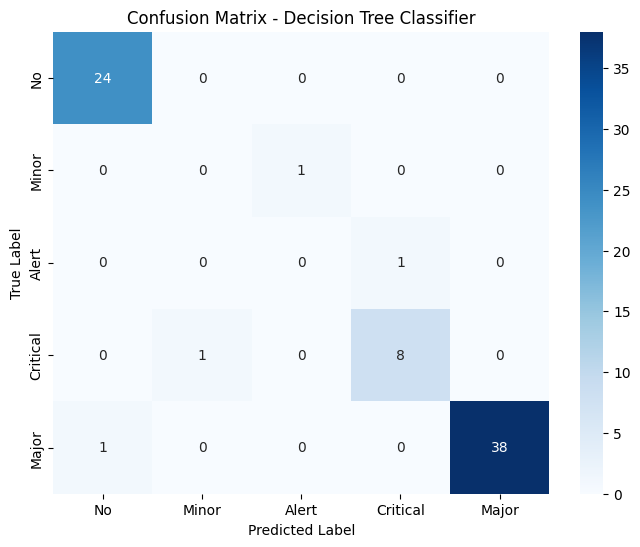

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Linear Regression

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict

In [ ]:
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

In [ ]:
rain = rain.dropna()


In [ ]:
rain = rain.replace('No', 0)

In [ ]:
rain = rain.replace('Alert', 1)

In [ ]:
rain = rain.replace('Minor', 2)

In [ ]:
rain = rain.replace('Major', 3)
rain = rain.replace('Critical', 4)

<ipython-input-170-5be9f875211a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rain = rain.replace('Critical', 4)


In [ ]:
X = rain.drop('flood level (m)', axis=1)  # Adjust 'target_column'
y = rain['flood level (m)']               # Adjust 'target_column'


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 4.33
Mean Absolute Error (MAE): 1.15
R-squared (R²): 0.69


In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
y_cv_pred = cross_val_predict(lr_model, X, y, cv=kfold)
cv_mse = mean_squared_error(y, y_cv_pred)
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_r2 = r2_score(y, y_cv_pred)

In [ ]:
print("\nCross-Validation Results:")
print(f"Cross-Validated Mean Squared Error (CV MSE): {cv_mse:.2f}")
print(f"Cross-Validated Mean Absolute Error (CV MAE): {cv_mae:.2f}")
print(f"Cross-Validated R-squared (CV R²): {cv_r2:.2f}")


Cross-Validation Results:
Cross-Validated Mean Squared Error (CV MSE): 3.40
Cross-Validated Mean Absolute Error (CV MAE): 1.31
Cross-Validated R-squared (CV R²): 0.74


# Ridge Regression

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold

In [ ]:
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

In [ ]:
rain = rain.dropna()


In [ ]:
X = rain.drop('flood level (m)', axis=1)  # Adjust 'target_column'
y = rain['flood level (m)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
ridge_model = Ridge(alpha=1.0)

In [ ]:
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
y_pred = ridge_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 3.27
Mean Absolute Error (MAE): 1.04
R-squared (R²): 0.77


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
y_cv_pred = cross_val_predict(ridge_model, X, y, cv=kfold)

In [ ]:
cv_mse = mean_squared_error(y, y_cv_pred)
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_r2 = r2_score(y, y_cv_pred)

print("\nCross-Validation Results:")
print(f"Cross-Validated Mean Squared Error (CV MSE): {cv_mse:.2f}")
print(f"Cross-Validated Mean Absolute Error (CV MAE): {cv_mae:.2f}")
print(f"Cross-Validated R-squared (CV R²): {cv_r2:.2f}")


Cross-Validation Results:
Cross-Validated Mean Squared Error (CV MSE): 2.97
Cross-Validated Mean Absolute Error (CV MAE): 1.25
Cross-Validated R-squared (CV R²): 0.78


# Lasso Regression

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold

In [ ]:
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

In [ ]:
rain = rain.dropna()


In [ ]:
X = rain.drop('flood level (m)', axis=1)  # Adjust 'target_column'
y = rain['flood level (m)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
lasso_model = Lasso(alpha=1.0)

In [ ]:
lasso_model.fit(X_train, y_train)

Lasso()

In [ ]:
y_pred = lasso_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 4.24
Mean Absolute Error (MAE): 1.82
R-squared (R²): 0.70


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
y_cv_pred = cross_val_predict(lasso_model, X, y, cv=kfold)

In [ ]:
cv_mse = mean_squared_error(y, y_cv_pred)
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_r2 = r2_score(y, y_cv_pred)

print("\nCross-Validation Results:")
print(f"Cross-Validated Mean Squared Error (CV MSE): {cv_mse:.2f}")
print(f"Cross-Validated Mean Absolute Error (CV MAE): {cv_mae:.2f}")
print(f"Cross-Validated R-squared (CV R²): {cv_r2:.2f}")


Cross-Validation Results:
Cross-Validated Mean Squared Error (CV MSE): 5.18
Cross-Validated Mean Absolute Error (CV MAE): 1.92
Cross-Validated R-squared (CV R²): 0.61


# Polynomial Regression

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

In [ ]:
rain = rain.dropna()

In [ ]:
X = rain.drop('flood level (m)', axis=1)  # Adjust 'target_column'
y = rain['flood level (m)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

In [ ]:
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4, 5],  # Try degrees from 2 to 5
    'ridge__alpha': [0.1, 1.0, 10.0]  # Regularization strength
}

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=4.16104e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=2.96361e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=3.31297e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=2.49772e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4, 5],
                         'ridge__alpha': [0.1, 1.0, 10.0]},
             scoring='r2')

In [ ]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'polynomialfeatures__degree': 2, 'ridge__alpha': 10.0}


In [ ]:
pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Ridge(alpha=10.0))

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=10.0))])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 2.57
Mean Absolute Error (MAE): 1.16
R-squared (R²): 0.82


# Bayesian Linear Regression

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import BayesianRidge

In [ ]:
file_path = 'flood.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   flood level (m) Flood_Status  temperature_2m_max  temperature_2m_min  \
0             5.97        Alert           29.820635           23.531746   
1             5.80        Alert           27.300000           24.100000   
2             5.20        Alert           26.750000           23.850000   
3             0.00           No           28.244444           23.222222   
4             0.00           No           27.503261           22.429348   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0            26.206349                 37.042857                 28.509524   
1            25.150000                 32.150000                 28.850000   
2            24.900000                 31.750000                 28.850000   
3            25.180556                 33.579167                 27.602778   
4            24.606522                 32.257609                 26.443478   

   apparent_temperature_mean   rain_sum  precipitation_hours  \
0               

In [ ]:
rain = rain.dropna()

In [ ]:
X = rain.drop('flood level (m)', axis=1)  # Adjust 'target_column'
y = rain['flood level (m)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
bayesian_model = BayesianRidge()

In [ ]:
bayesian_model.fit(X_train, y_train)

BayesianRidge()

In [ ]:
y_pred = bayesian_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 3.29
Mean Absolute Error (MAE): 1.04
R-squared (R²): 0.77


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
y_cv_pred = cross_val_predict(bayesian_model, X, y, cv=kfold)

In [ ]:
cv_mse = mean_squared_error(y, y_cv_pred)
cv_mae = mean_absolute_error(y, y_cv_pred)
cv_r2 = r2_score(y, y_cv_pred)

print("\nCross-Validation Results:")
print(f"Cross-Validated Mean Squared Error (CV MSE): {cv_mse:.2f}")
print(f"Cross-Validated Mean Absolute Error (CV MAE): {cv_mae:.2f}")
print(f"Cross-Validated R-squared (CV R²): {cv_r2:.2f}")


Cross-Validation Results:
Cross-Validated Mean Squared Error (CV MSE): 3.08
Cross-Validated Mean Absolute Error (CV MAE): 1.27
Cross-Validated R-squared (CV R²): 0.77
